In [1]:
from __future__ import print_function
from utils import print_version

import IPython
print_version('IPython',IPython)

import numpy as np
print_version('numpy', np)

import scipy as sp
print_version('scipy', sp)

import matplotlib
print_version('matplotlib', matplotlib)

import matplotlib.pyplot as plt

import sklearn
print_version('scikit learn', sklearn)

import seaborn
print_version('saborn', seaborn)

import pandas as pd
print_version('pands', pd)

('IPython: ', '3.1.0')
('numpy: ', '1.9.2')
('scipy: ', '0.15.1')
('matplotlib: ', '1.4.3')
('scikit learn: ', '0.16.1')
('saborn: ', '0.5.1')
('pands: ', '0.16.0')


In [2]:
#Set up default plotting environment
seaborn.set()
%matplotlib inline

##Data Exploration

In [3]:
from utils import get_data
data = get_data('csv', 'data/train.csv')

In [4]:
print('shape of training data', data.shape)

shape of training data (891, 12)


In [5]:
#Split data into 80/20 split using helper func
from utils import partition_data
trainingBatch, testingBatch = partition_data(data, 'PassengerId', 8)

print('shape of trainingBatch', trainingBatch.shape)
print('shape of testBatch', testingBatch.shape)

shape of trainingBatch (713, 12)
shape of testBatch (89, 12)


In [6]:
#Look at our data
trainingBatch.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [7]:
#Grab our feature names
featureNames = trainingBatch.columns
featureNames.view()

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'], dtype='object')

In [8]:
#Look at basic statistical summary data
trainingBatch.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,713.000000,713.000000,713.000000,580.000000,713.000000,713.000000,713.000000
mean,445.375877,0.373072,2.314165,29.966103,0.552595,0.349229,30.228967
std,257.462104,0.483960,0.837689,14.736764,1.167369,0.743929,41.915033
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.400000
75%,667.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


(-1, 3)

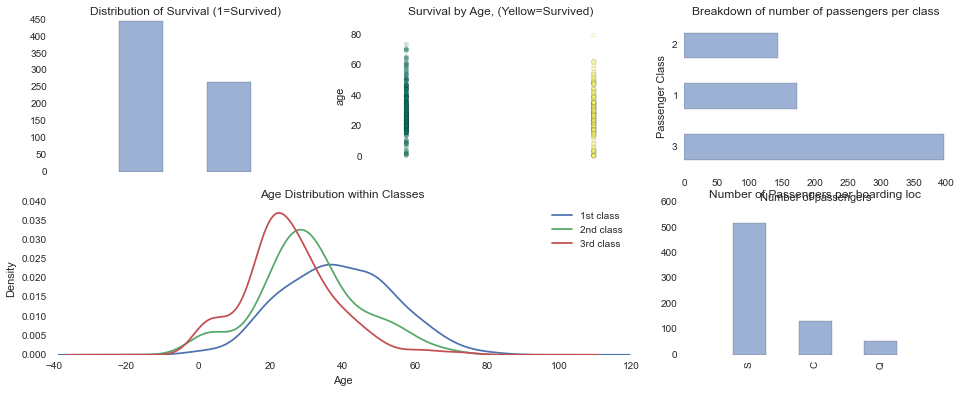

In [9]:
#Some initial graphical exploration

#Specify parameters of graphs
SurvivalFigure = plt.figure(figsize=(16,6), dpi=1600)
alpha_scatterplot = 0.2
alpha_barchart = 0.55

#Basic survival plot
ax1 = plt.subplot2grid((2,3), (0,0))
trainingBatch.loc[ : , 'Survived'].value_counts().plot(kind='bar',alpha=alpha_barchart)
ax1.set_xlim(-1,2)
plt.title('Distribution of Survival (1=Survived)')

#Survival By Age
ax2 = plt.subplot2grid((2,3), (0,1))
plt.scatter(trainingBatch.loc[:, 'Survived'],trainingBatch.loc[:, 'Age'], c=trainingBatch.loc[:, 'Survived'], cmap='summer', alpha=alpha_scatterplot )
plt.grid(b=True, which='major', axis='y')
plt.ylabel('age')
plt.title('Survival by Age, (Yellow=Survived)')

#Passenger Class Distribution
ax3 = plt.subplot2grid((2,3), (0,2))
trainingBatch.loc[:, 'Pclass'].value_counts().plot(kind='barh', alpha=alpha_barchart)
plt.ylabel('Passenger Class')
plt.xlabel('Number of passengers')
plt.title('Breakdown of number of passengers per class')

#Kernel Density Estimate of Age Distribution within classes
ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
for classNum in range(3):
    trainingBatch.loc[:, 'Age'][trainingBatch.Pclass == classNum+1].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(('1st class', '2nd class', '3rd class'), loc='best')

#Passengers by boarding loc
ax5 = plt.subplot2grid((2,3), (1,2))
trainingBatch.loc[: , 'Embarked'].value_counts().plot(kind='bar', alpha=alpha_barchart)
plt.title('Number of Passengers per boarding loc')
ax5.set_xlim(-1,len(trainingBatch.Embarked.value_counts()))

###Explore Death/Survival

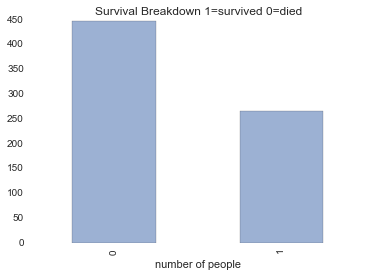

In [10]:
plt.figure(figsize=(16,6))
fig, ax = plt.subplots()
trainingBatch.loc[:, 'Survived'].value_counts().plot(kind='bar', alpha=alpha_barchart)
plt.xlabel('number of people')
plt.title('Survival Breakdown 1=survived 0=died')

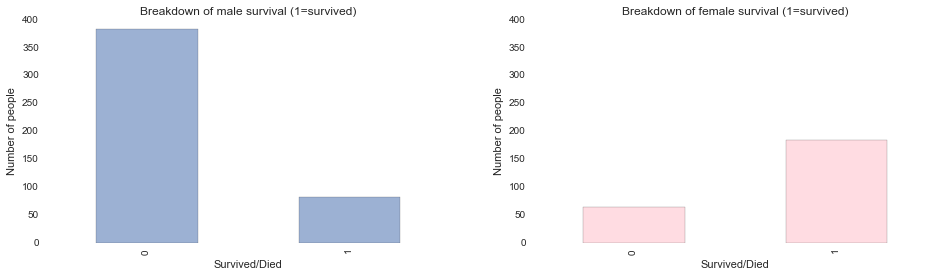

In [11]:
genderFigure = plt.figure(figsize=(16,4))

maleAxes = genderFigure.add_subplot(1,2,1)
maleMask = trainingBatch.Sex == 'male'
maleSurvivalCounts = trainingBatch.Survived[maleMask].value_counts()
maleSurvivalCounts.plot(kind='bar', alpha=alpha_barchart)
plt.xlabel('Survived/Died')
plt.ylabel('Number of people')
plt.title('Breakdown of male survival (1=survived)')

femaleAxes = genderFigure.add_subplot(1,2,2, sharey=maleAxes)
femaleMask = trainingBatch.Sex == 'female'
femaleSurvivalCounts = trainingBatch.Survived[femaleMask].value_counts()
femaleSurvivalCounts.sort(0) #so both display same x axis
femaleSurvivalCounts.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.xlabel('Survived/Died')
plt.ylabel('Number of people')
plt.title('Breakdown of female survival (1=survived)')

In [12]:
#Graph survival in terms of percentages
numberOfWomen = len(trainingBatch[femaleMask])
numberOfMen = len(trainingBatch[maleMask])

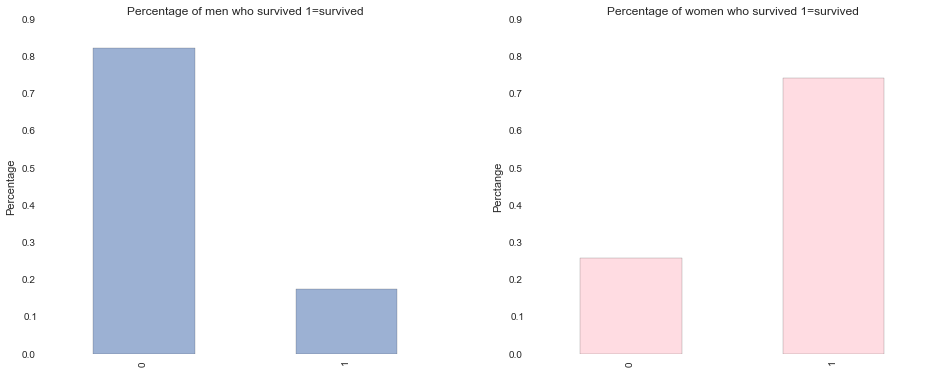

In [13]:
genderPercentagesFigure = plt.figure(figsize=(16,6))

maleAxes = genderPercentagesFigure.add_subplot(1,2,1)
maleSurvivalPercentages = maleSurvivalCounts / numberOfMen
maleSurvivalPercentages.plot(kind='bar', alpha=alpha_barchart)
plt.ylabel('Percentage')
plt.title('Percentage of men who survived 1=survived')

femaleAxes = genderPercentagesFigure.add_subplot(1,2,2, sharey=maleAxes)
femaleSurvivalPercentages = femaleSurvivalCounts / numberOfWomen
femaleSurvivalPercentages.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.ylabel('Perctange')
plt.title('Percentage of women who survived 1=survived')

####Gender Survival Breakdown Into Passenger Class


In [14]:
#Get the three classes
upperClass = trainingBatch[trainingBatch.Pclass==1]
middleClass = trainingBatch[trainingBatch.Pclass==2]
lowerClass = trainingBatch[trainingBatch.Pclass==3]

/Users/Jslice/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1815: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


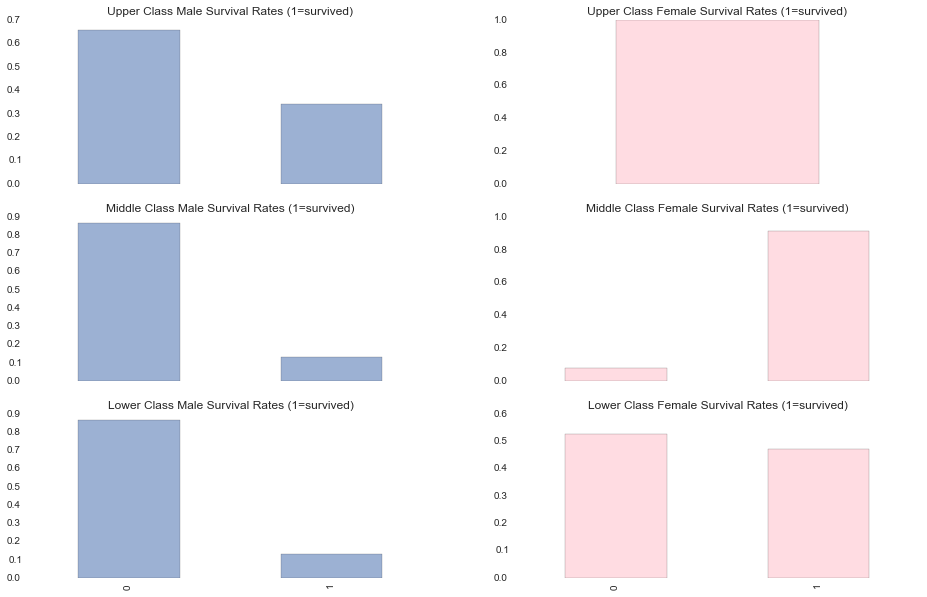

In [15]:
#make gender survival classes for all 3 classes
classGenderFigure = plt.figure(figsize=(16,10))

##Upper Class##
upperClassMaleAx = classGenderFigure.add_subplot(3,2,1)
upperClassMaleCount = len(upperClass[maleMask])
upperClassMPercentages = upperClass.Survived[maleMask].value_counts() / upperClassMaleCount
upperClassMPercentages.plot(kind='bar', alpha=alpha_barchart)
plt.title('Upper Class Male Survival Rates (1=survived)')


upperClassFemaleAx = classGenderFigure.add_subplot(3,2,2)
upperClassFemaleCount = len(upperClass[femaleMask])
upperClassFPercentages = upperClass.Survived[femaleMask].value_counts() / upperClassFemaleCount
upperClassFPercentages.sort()
upperClassFPercentages.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.title('Upper Class Female Survival Rates (1=survived)')


##Middle Class##
middleClassMaleAx = classGenderFigure.add_subplot(3,2,3)
middleClassMaleCount = len(middleClass[maleMask])
middleClassMPercentages = middleClass.Survived[maleMask].value_counts() / middleClassMaleCount
middleClassMPercentages.plot(kind='bar', alpha=alpha_barchart)
plt.title('Middle Class Male Survival Rates (1=survived)')

middleClassFemaleAx = classGenderFigure.add_subplot(3,2,4)
middleClassFemaleCount = len(middleClass[femaleMask])
middleClassFPercentages = middleClass.Survived[femaleMask].value_counts() / middleClassFemaleCount
middleClassFPercentages.sort(0)
middleClassFPercentages.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.title('Middle Class Female Survival Rates (1=survived)')

##Lower Class##
lowerClassMaleAx = classGenderFigure.add_subplot(3,2,5)
lowerClassMaleCount = len(lowerClass[maleMask])
lowerClassMPercentanges = lowerClass.Survived[maleMask].value_counts() / lowerClassMaleCount
lowerClassMPercentanges.plot(kind='bar', alpha=alpha_barchart)
plt.title('Lower Class Male Survival Rates (1=survived)')


lowerClassFemaleAx = classGenderFigure.add_subplot(3,2,6)
lowerClassFemaleCount = len(lowerClass[femaleMask])
lowerClassFPercentanges = lowerClass.Survived[femaleMask].value_counts() / lowerClassFemaleCount
lowerClassFPercentanges.sort(ascending=False)
lowerClassFPercentanges.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.title('Lower Class Female Survival Rates (1=survived)')

####Higher Dimensional Scatterplot Analysis

In [16]:
trainingAge = trainingBatch.loc[: , 'Age']
trainingFare = trainingBatch.loc[: ,'Fare']
trainingSurvived = trainingBatch.loc[:, 'Survived']

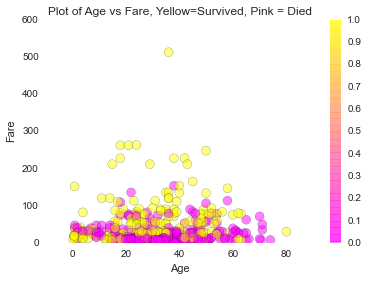

In [17]:
plt.scatter(trainingAge, trainingFare, c=trainingSurvived, s=80, cmap='spring', alpha=0.5)
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.ylim(0,600)
plt.title('Plot of Age vs Fare, Yellow=Survived, Pink = Died')

###Identify Families/Traveling Groups and Analyze Survival Rates

In [18]:
ticketGrouping = trainingBatch.groupby(trainingBatch['Ticket'])
ticketGroupingSurvivalData = ticketGrouping['Survived'].agg([np.sum, len])
ticketGroupingSurvivalData['percentLived'] = ticketGroupingSurvivalData['sum'] / ticketGroupingSurvivalData['len']

In [19]:
ticketGroupingSurvivalGroupSizes = ticketGroupingSurvivalData.groupby('len')
ticketGroupingSurvivalGroupSizes.describe()

percentLived         sum
len                                
1   count    472.000000  472.000000
    mean       0.302966    0.302966
    std        0.460028    0.460028
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        1.000000    1.000000
    max        1.000000    1.000000
2   count     78.000000   78.000000
    mean       0.596154    1.192308
    std        0.411346    0.822693
    min        0.000000    0.000000
    25%        0.125000    0.250000
    50%        0.500000    1.000000
    75%        1.000000    2.000000
    max        1.000000    2.000000
3   count     11.000000   11.000000
    mean       0.575758    1.727273
    std        0.424026    1.272078
    min        0.000000    0.000000
    25%        0.166667    0.500000
    50%        0.666667    2.000000
    75%        1.000000    3.000000
    max        1.000000    3.000000
4   count      3.000000    3.000000
    mean       0.583333    2.333333
    std        0.520416    2.081666
    min        0.000000    0.000000
    25%        0.375000    1.500000
    50%        0.750000    3.000000
    75%        0.875000    3.500000
    max        1.000000    4.000000
5   count      4.000000    4.000000
    mean       0.000000    0.000000
    std        0.000000    0.000000
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        0.000000    0.000000
    max        0.000000    0.000000
6   count      1.000000    1.000000
    mean       0.666667    4.000000
    std             NaN         NaN
    min        0.666667    4.000000
    25%        0.666667    4.000000
    50%        0.666667    4.000000
    75%        0.666667    4.000000
    max        0.666667    4.000000
7   count      2.000000    2.000000
    mean       0.000000    0.000000
    std        0.000000    0.000000
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        0.000000    0.000000
    max        0.000000    0.000000

In [20]:
ticketGroupingSurvivalGroupSizesMean = ticketGroupingSurvivalGroupSizes['percentLived'].mean()

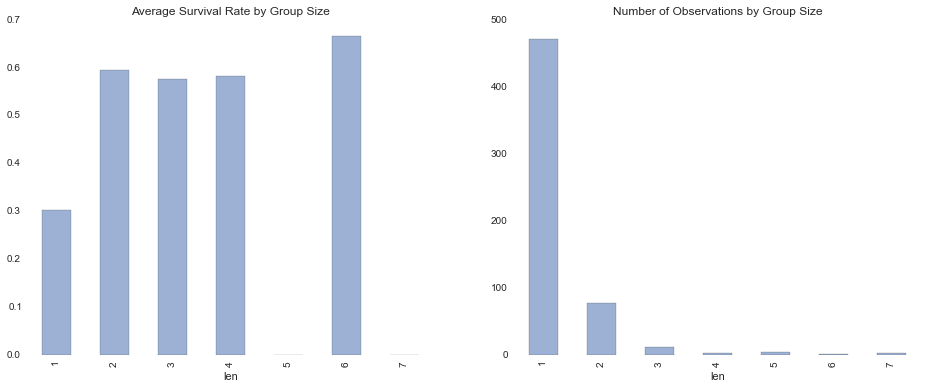

In [21]:
ticketGroupSurvivalFig = plt.figure(figsize=(16,6))
ticketGroupSurvivalAx1 = ticketGroupSurvivalFig.add_subplot(1,2,1)
ticketGroupingSurvivalGroupSizesMean.plot(kind='bar', alpha=alpha_barchart)
plt.title('Average Survival Rate by Group Size')
ticketGroupSurvivalAx2 = ticketGroupSurvivalFig.add_subplot(1,2,2)
ticketGroupingSurvivalGroupSizes['percentLived'].count().plot( kind='bar', alpha=alpha_barchart)
plt.title('Number of Observations by Group Size')

Unfortunately there are serious sample size costraints. The only group sizes we can might be able to use are size one and two

##Data Cleaning/Munging

Need to come back to this and try other techniques such as using the median or interpolation

In [22]:
#Missing Data Amount
trainingBatch.isnull().sum() / len(trainingBatch) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            18.653576
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          76.718093
Embarked        0.280505
dtype: float64

##Data Modeling

In [23]:
#Results dictionary to hold regression results
results = {}

###Random Forest

In [24]:
#Import ensemble library from sklean
import sklearn.ensemble as ske
from patsy import dmatrices
#make random forst model and fit model to the training data
randomForestFormula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

randomForestY, randomForestX = dmatrices(randomForestFormula, data=trainingBatch, return_type='dataframe')

In [25]:
print('shape of randomForestX', randomForestX.shape)
print('shape of randomForestY', randomForestY.shape)

shape of randomForestX (578, 9)
shape of randomForestY (578, 1)


In [26]:
randomForestX.describe()

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Age,SibSp,Parch
count,578,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,1,0.233564,0.512111,0.643599,0.038062,0.780277,29.896782,0.522491,0.380623
std,0,0.423464,0.500286,0.479351,0.191512,0.414418,14.697954,0.947685,0.774667
min,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000
25%,1,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000
50%,1,0.000000,1.000000,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000
75%,1,0.000000,1.000000,1.000000,0.000000,1.000000,39.000000,1.000000,0.750000
max,1,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,5.000000,5.000000


In [27]:
randomForestClassifier = ske.RandomForestClassifier(n_estimators=100)

In [28]:
randomForestResults = randomForestClassifier.fit(X=randomForestX, y=randomForestY)

/Users/Jslice/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [29]:
#score results
randomForestScore = randomForestResults.score(randomForestX, randomForestY) 

In [30]:
randomForestTestingY, randomForestTestingX = dmatrices(randomForestFormula, data= testingBatch, return_type='dataframe')

results['randomForest'] = randomForestClassifier.predict(randomForestTestingX)

###K-Nearest-Neighbors

In [31]:
from sklearn import neighbors

In [32]:
kneighborsFormula = 'Survived ~ Age + Fare'
kneighborsY, kneighborsX = dmatrices(kneighborsFormula, data=trainingBatch, return_type='dataframe')
kneighborsY = kneighborsY.dropna()
kneighborsX = kneighborsX.dropna()

In [33]:
print('shape of kneighborsX', kneighborsX.shape)
print('shape of kneighborsY', kneighborsY.shape)

shape of kneighborsX (580, 3)
shape of kneighborsY (580, 1)


In [34]:
kneighborsModel = neighbors.KNeighborsClassifier(n_neighbors=10)
kneighborsModel.fit(kneighborsY, kneighborsX)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

In [35]:
kneighborsTestingY, kneighborsTestingX = dmatrices(kneighborsFormula, data=testingBatch, return_type='dataframe')
kneighborsTestingY = kneighborsTestingY.dropna()
kneighborsTestingX = kneighborsTestingX.dropna()
results['kNeighbors'] = kneighborsModel.predict(kneighborsTestingX)

ValueError: query data dimension must match training data dimension

###Logistic Regression

In [36]:
from patsy import dmatrices
import statsmodels.api as sm

In [37]:
logisticRegressionFormula ='Survived ~C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Fare'
logisticRegressionY, logisticRegressionX = dmatrices(logisticRegressionFormula, data=trainingBatch, return_type='dataframe')

In [38]:
print('shape of logitX', logisticRegressionX.shape)
print('shape of logitY', logisticRegressionY.shape)

shape of logitX (578, 9)
shape of logitY (578, 1)


In [39]:
logitModel = sm.Logit(logisticRegressionY, logisticRegressionX)
logitResults = logitModel.fit()

Optimization terminated successfully.
         Current function value: 0.425401
         Iterations 7


In [40]:
logisticRegressionTestingY, logisticRegressionTestingX = dmatrices(logisticRegressionFormula, data=testingBatch, return_type='dataframe')

In [41]:
results['logisticRegression'] = logitResults.predict(logisticRegressionTestingX)

In [42]:
results['logisticRegression'] = results['logisticRegression'].round()

##Model Evaluation/Validation

In [43]:
from ModelValidation import print_model_information, model_accuracy, print_roc_curve, print_confusion_matrix

In [44]:
#Print Model Info
print_model_information('RandomForest', randomForestFormula, randomForestX.shape)
print_model_information('Logitistic Regression', logisticRegressionFormula, logisticRegressionX.shape)
print_model_information('K Nearest Neighbors', kneighborsFormula, kneighborsX.shape)

('RandomForest', 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)', (578, 9))
('Logitistic Regression', 'Survived ~C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Fare', (578, 9))
('K Nearest Neighbors', 'Survived ~ Age + Fare', (580, 3))


In [45]:
#Print model accuracies
model_accuracy('Random Forest', randomForestTestingY['Survived'], results['randomForest'])
model_accuracy('Logistic Regression', logisticRegressionTestingY['Survived'], results['logisticRegression'])
# model_accuracy('K Nearest Neighbors', kneighborsTestingY['Survived'], results['kNeighbors'])

('Random Forest', 0.84375)
('Logistic Regression', 0.796875)


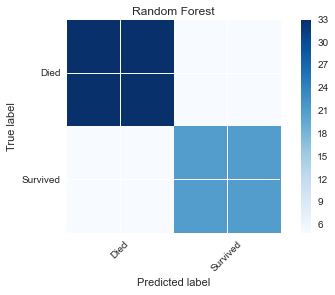

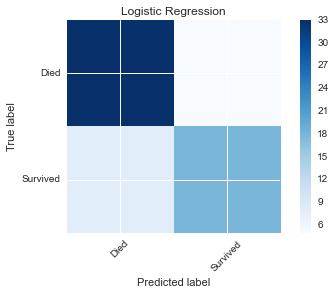

In [46]:
#Print Confusion Matrices
outcomes = ['Died', 'Survived']
print_confusion_matrix('Random Forest', results['randomForest'],randomForestTestingY['Survived'],outcomes , title='Random Forest', cmap=plt.cm.Blues)
print_confusion_matrix('Logistic Regression', results['logisticRegression'], logisticRegressionTestingY['Survived'], outcomes,title='Logistic Regression', cmap=plt.cm.Blues)
# print_confusion_matrix('K Nearest Neighbors', results['kNeighbors'], kneighborsTestingY['Survived'],outcomes ,title='K Nearest Neighbors', cmap=plt.cm.Blues)

('ROC Curve for model: ', 'Random Forest')
('ROC Area Under Curve Score: ', 0.83805668016194335)


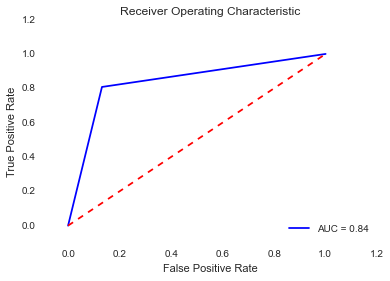

('ROC Curve for model: ', 'Logistic Regression')
('ROC Area Under Curve Score: ', 0.78036437246963564)


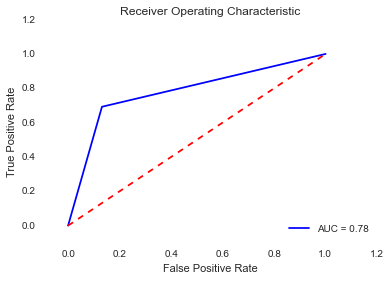

In [48]:
print_roc_curve('Random Forest', results['randomForest'], randomForestTestingY)
print_roc_curve('Logistic Regression', results['logisticRegression'], logisticRegressionTestingY)
# print_roc_curve('K Nearest Neighbors', kNeighborsTestingY, results['kNeighbors'])